# Conformal Regression

Conformal Prediction (CP) は予測区間（prediction intervals）を算出するためのフレームワーク。


1. 点推定の予測（普通の回帰モデル）を行う$E[y|x] \approx f(x)$ 
2. 残差$r = y - f(x)$を学習する: $Q_{\tau}[r|x] \approx g(x)$

DMLのcross-fittingのように、train setでは残差の予測モデルをfitせず、分けておいたcalibration setで残差の学習を行う


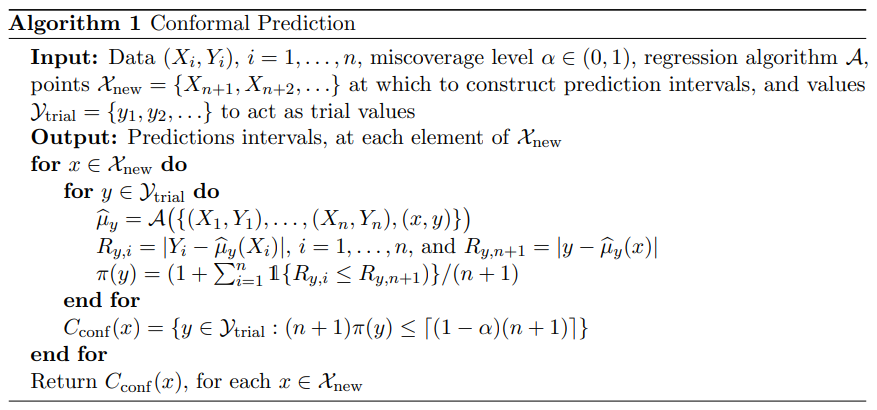

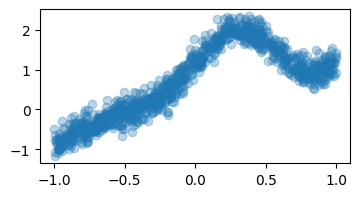

In [27]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
np.random.seed(0)
x = np.random.uniform(low=-1, high=1, size=n)
y = x**3 + 2 * np.exp(-6 * (x - 0.3)**2)
y = y + np.random.normal(loc=0, scale=1/5, size=n)

fig, ax = plt.subplots(figsize=[4, 2])
ax.scatter(x, y, alpha=0.3)
fig.show()

from sklearn.model_selection import train_test_split
X = x.reshape(-1, 1)
X_train, X_cal, y_train, y_cal = train_test_split(X, y, test_size=0.33, random_state=42)

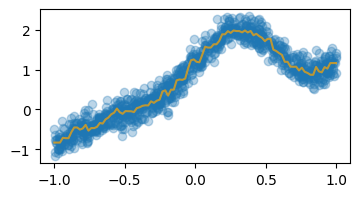

In [28]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(verbose=-1)
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=[4, 2])
ax.scatter(x, y, alpha=0.3)

x_range = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
ax.plot(x_range, model.predict(x_range.reshape(-1, 1)), alpha=0.7, color="orange")
fig.show()

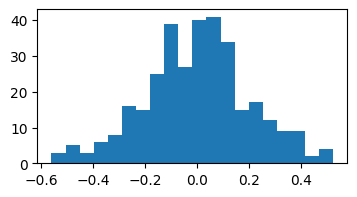

In [34]:
y_pred = model.predict(X_cal)
residual = y_cal - y_pred

fig, ax = plt.subplots(figsize=[4, 2])
ax.hist(residual, bins=20)
fig.show()

In [35]:
model_resid = LGBMRegressor(verbose=-1)
model_resid.fit(X_cal, residual)

LGBMRegressor(verbose=-1)

## 参考

- [Conformal prediction - Wikipedia](https://en.wikipedia.org/wiki/Conformal_prediction)
- [tidymodels - Conformal inference for regression models](https://www.tidymodels.org/learn/models/conformal-regression/)
- [ryantibs/conformal: Tools for conformal inference in regression](https://github.com/ryantibs/conformal)